<a href="https://colab.research.google.com/github/dgamorimm/recommendation_movies/blob/main/Introdu%C3%A7%C3%A3o_a_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,1.225735e+09
1,1,110,4.0,1.225865e+09
2,1,158,4.0,1.225734e+09
3,1,260,4.5,1.225735e+09
4,1,356,5.0,1.225735e+09


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,125352.000000,125352.000000,125352.000000,1.253510e+05
mean,646.085056,27844.756701,3.584303,1.273926e+09
std,372.155626,48904.755902,1.049899,2.554791e+08
min,1.000000,1.000000,0.500000,8.256105e+08
25%,318.000000,1208.000000,3.000000,1.053813e+09
50%,624.000000,3168.000000,4.000000,1.268751e+09
75%,974.000000,40815.000000,4.500000,1.503634e+09
max,1293.000000,288269.000000,5.000000,1.689838e+09


# Primeira Tentativa de Recomendação

In [4]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

filmeId
318     476
356     433
2571    431
296     422
260     410
Name: count, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos

In [6]:
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,309.0
2,Jumanji (1995),Adventure|Children|Fantasy,113.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,5.0
5,Father of the Bride Part II (1995),Comedy,60.0


In [7]:
filmes.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,476.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,433.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,431.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,422.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,410.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,409.0
527,Schindler's List (1993),Drama|War,356.0
4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,351.0
2959,Fight Club (1999),Action|Crime|Drama|Thriller,344.0


In [8]:
notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.857605
2    3.349558
3    3.105769
4    3.400000
5    3.058333
Name: nota, dtype: float64

In [9]:
filmes['nota_medias'] = notas_medias

In [10]:
filmes.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,476.0,4.376050
356,Forrest Gump (1994),Comedy|Drama|Romance|War,433.0,4.019630
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,431.0,4.112529
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,422.0,4.194313
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,410.0,4.048780
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,409.0,4.095355
527,Schindler's List (1993),Drama|War,356.0,4.202247
4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,351.0,4.021368
2959,Fight Club (1999),Action|Crime|Drama|Thriller,344.0,4.251453


# Uma segunda heuristica (nota média)

In [11]:
filmes.sort_values('nota_medias', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_medias
filmeId,,,,
36373,Comrades: Almost a Love Story (Tian mi mi) (1996),Drama|Romance,1.0,5.0
89281,Birdemic: Shock and Terror (2010),Romance|Thriller,1.0,5.0
26148,"Train, The (1964)",Action|Thriller|War,2.0,5.0
2563,Dangerous Beauty (1998),Drama,1.0,5.0
8119,Crossroads (1986),Drama,1.0,5.0
213353,My Hero Academia: Heroes Rising (2019),Animation,1.0,5.0
56474,My Mother (Ma mère) (2004),Drama,1.0,5.0
7037,High Heels (Tacones lejanos) (1991),Comedy|Drama,1.0,5.0
89386,Pearl Jam Twenty (2011),Documentary|Musical,1.0,5.0


In [12]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos > 50')
filmes_com_mais_de_50_votos.sort_values('nota_medias', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,476.0,4.376050
1213,Goodfellas (1990),Crime|Drama,167.0,4.332335
1221,"Godfather: Part II, The (1974)",Crime|Drama,188.0,4.327128
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,155.0,4.306452
858,"Godfather, The (1972)",Crime|Drama,318.0,4.295597
109487,Interstellar (2014),Sci-Fi|IMAX,153.0,4.287582
913,"Maltese Falcon, The (1941)",Film-Noir|Mystery,74.0,4.283784
204698,Joker (2019),Crime|Drama|Thriller,52.0,4.259615
2959,Fight Club (1999),Action|Crime|Drama|Thriller,344.0,4.251453


# Recomendação baseada em similaridade

In [13]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_medias
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,309.0,3.857605
21,Get Shorty (1995),Comedy|Crime|Thriller,91.0,3.708791
19,Ace Ventura: When Nature Calls (1995),Comedy,99.0,2.702020
10,GoldenEye (1995),Action|Adventure|Thriller,145.0,3.448276
11,"American President, The (1995)",Comedy|Drama|Romance,63.0,3.746032
7,Sabrina (1995),Comedy|Romance,43.0,3.500000
2,Jumanji (1995),Adventure|Children|Fantasy,113.0,3.349558


In [14]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('generos=="Adventure|Children|Fantasy"')
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values('nota_medias', ascending=False).head()
# o drop faz com que ele remova os filmes que ele já assistiu

,titulo,generos,total_de_votos,nota_medias
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,161.0,3.835404
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,54.0,3.527778
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,67.0,3.328358


# Collaborative filtering _X_ Content based filtering

## Distância Euclidiana

### Objetivo: Se o usuário gostou de um filme, veja todos os usuários que também gostaram do filme e recomende os filmes baseados nesses usuários

A gente comentou que existem algumas maneiras diferentes de abordar um problema de recomendação, por exemplo por meio de uma regressão com probabilidades, com uma classificação de qual elemento recomendar, como um problema de ranqueamento, etc.

Nessa etapa, vamos utilizar os dados que viemos trabalhando para criarmos a base de um algoritmo de Machine Learning. No nosso conjunto de dados, temos duas informações muito importantes: as características dos filmes e as notas que os usuários deram a eles.

No último exemplo, o nosso usuário tinha apenas assistido a alguns filmes, mas não tínhamos as notas que ele deu para eles. Ele poderia ter odiado Jumanji, e nesse caso não faria sentido recomendar um filme parecido com esse.

Agora, vamos tentar outra abordagem de recomendação: se o Guilherme gostou do Jumanji, buscaremos outros usuários que gostaram de Jumanji, acreditando que pessoas similares em uma área vão compartilhar outras características similares. Claro, a definição de "similar" é algo que também teremos que abordar.

Vamos imaginar um cenário simples para começarmos a refletir. O João deu nota 4 para o filme Toy Story, a Maria deu nota 5 e o Paulo deu nota 3. Dado esse conjunto de dados, quem é a pessoa mais parecida com a Maria? Bom, eu diria que o João é a pessoa mais parecida, pois ele deu uma nota mais próxima que a dela.

E quem é a pessoa mais próxima do João? Dá na mesma, pois tanto Maria quanto Paulo estão à mesma distância dele. Se se adicionássemos outra usuária, a Joana, que deu 3,5 para Toy Story? Agora, a pessoa mais próxima da Maria ainda é o João, mas a pessoa mais próxima do João é a Joana, a pessoa mais próxima de Paulo também é a Joana, e João e Paulo estão igualmente próximos da Joana.

Nesse cenário, a distância entre João e Maria é 1, e a distância entre João e Joana é 0,5. Por isso, o João está mais próximo da Joana que da Maria. É uma simples conta de subtração (x - y). Mas temos que tomar cuidado, afinal, 5 - 4 (a distância entre Maria e João) é 1, e 4 - 5 (a distância entre João e Maria) é... -1? O comum é fazermos essa conta mantendo sempre os valores positivos, pegando o valor absoluto dessa diferença.

Tudo isso está sendo calculado com base em apenas um filme, mas e se tivéssemos dois? Vamos supor que o João deu as notas 4 e 4,5, e a Maria deu as notas 5 e 5. Os filmes, nesse caso, não importam. Como calcularemos a distância entre eles?

Quando tínhamos uma reta, bastava subtrairmos os dois pontos. Porém, agora não temos mais somente uma dimensão, mas sim duas. Podemos imaginar que cada um desses arranjos ([4, 4,5] e [5, 5]) são pontos compostos por X e Y, então vamos plotá-los.

Importaremos o matplotlib.pyplot como plt, e faremos plt.plot(4, 4.5, "go") para gerarmos um plano cartesiano com uma bolinha verde nessas coordenadas, representando as notas do João. Em seguida, faremos plt.plot(5, 5, "yo"), gerando uma bolinha amarela que representa as notas da Maria.

Agora, adicionaremos as legendas para esses dois pontos com plt.legend(["João, "Maria"]), e um título com plt.title("Calcular a distância entre dois entre dois usuários").

Para calcularmos a distância entre os pontos, vamos imaginar que eles são duas das três pontas de um triângulo. Usaremos, então, o ponto [5, 4.5] para completarmos esse triângulo. Vamos plotá-lo no plano com plt.plot(), utilizando linestyle para gerar as linhas e color="b" para mantermos somente uma cor nas três linhas.

### Procurando usuários similares

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paula deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

joão x maria
4 - 5 = 1 (a distancia é sempre positiva) ex.: se a distancia de mim até a porta for de 1m, a distancia da porta até mim também será de 1m e não -1m <br>

x-y ==> distancia

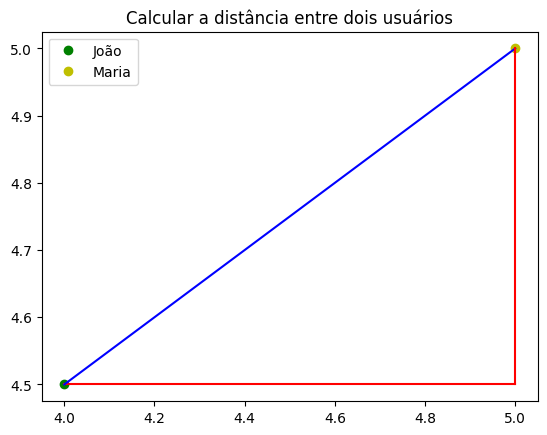

In [15]:
# joao = [4, 4.5]
# maria = [5, 5]

import matplotlib.pyplot as plt

plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['João', 'Maria'])
plt.title('Calcular a distância entre dois usuários')

plt.plot([4, 5], [4.5, 4.5], color='r', linestyle='-')
plt.plot([4, 5], [4.5, 5], color='b', linestyle='-')
plt.plot([5, 5], [4.5, 5], color='r', linestyle='-')

# O que esta em vermelho será os pontos que devemos calcular a distancia através da hipotenusa que esta em azul

In [16]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)  # distancia entre joão e maria

1.118033988749895

In [18]:
np.linalg.norm(joao - maria)

1.118033988749895

In [19]:
def pitagoras(a, b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre dois usuários')

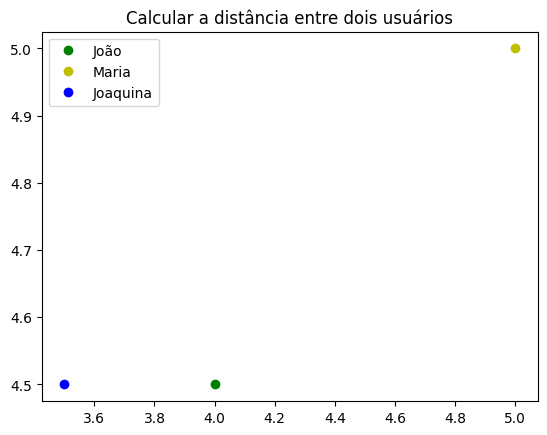

In [20]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Calcular a distância entre dois usuários')

In [21]:
joaquina = np.array([3.5, 4.5])
pitagoras(joao, joaquina)

0.5

In [22]:
pitagoras(joaquina, maria)

1.5811388300841898

In [23]:
def distancia(a, b):
  return np.linalg.norm(a - b)

Temos, então, um triângulo retângulo, e para calcularmos a distância entre João e Maria só precisaremos descobrir a hipotenusa desse triângulo.

Se tentarmos fazer uma operação entre os arrays que representam os pontos de joao e maria, não conseguiremos, pois o Python não suporta operações com listas nativamente. Porém, o Numpy suporta. Portanto, faremos import numpy as np e criaremos arrays do numpy para esses dois usuários. Iremos subtrair essas duas listas, obtendo a distância entre os dois em cada um dos eixos: no eixo x, a distância é -1; e no eixo y, ela é -0,5.

Agora, tiraremos a raiz quadrada da soma dos quadrados dessas duas distância, o que é justamente o teorema de Pitágoras. Para isso, definiremos a função pitagoras(a,b), que receberá dois pontos quaisquer. Nela, faremos a - b, devolvendo dois valores que chamaremos de delta_x e delta_y.

Em seguida, faremos return sqrt(delta_x * delta_x + delta_y * delta_y), de modo a obtermos raiz quadrada (square root) da soma dos quadrados desses valores, que é a nossa hipotenusa. Não se esqueça de importar a função sqrt() do módulo math.

Dessa forma, podemos fazer pitagoras(joao, maria), obtendo como retorno 1.1180. Portanto, a distância entre João e Maria, dadas as notas que eles deram para dois filmes, é 1.1180.

No Numpy, existe a função npt.linealg.norm(), que calcula diretamente isso que estamos chamando de pitágoras. Podemos, inclusive, redefinir a função pitagoras(a,b) como sendo simplesmente o retorno de np.linealg.norm(a - b), e o resultado continuará o mesmo.

Também podemos calcular as distâncias entre mais usuários. Como exemplo, faremos plt.plot(3.5, 4.5, "bo"), gerando um ponto azul que representará as notas de nossa terceira usuária, a Joaquina. Agora que temos esses três pontos, queremos saber quem é mais próximo do João. Na verdade, é possível inferir a resposta a olho, mas isso seria difícil se tivéssemos muitos usuários.

Matematicamente, podemos calcular o pitagoras() entre João e Maria, e em seguida entre João e Joaquina. Veremos, então, que a Joaquina está muito mais próxima do João (0.5) do que a Maria (1.11). Portanto, se formos recomendar filmes para o João, poderemos nos basear naqueles que a Joaquina gostou.

Essa é uma simplificação do algoritmo que iremos implementar aos poucos nesse curso. A ideia é utilizarmos a função pitagoras() para calcularmos as distâncias entre dois pontos - inclusive, podemos renomeá-la como distancia(). Esses dois pontos podem ser compostos por 2, 3, 4, 5 ou mais filmes, afinal, o numpy nos ajuda a calcular a diferença/norma entre dois vetores, obstante quantas forem as dimensões.

Com base nessas distâncias, saberemos dizer quais usuários são mais similares entre si, o que servirá de base para implementarmos o resto do algoritmo.

# Implementando a distancia euclidiana no dataset

In [24]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query(f'usuarioId=={usuario}')
  notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')
  return notas_do_usuario

In [25]:
notas_do_usuario(1)

,nota
filmeId,
1,4.0
110,4.0
158,4.0
260,4.5
356,5.0
...,...
40629,4.5
49647,5.0
52458,5.0


In [26]:
usuario_1 = notas_do_usuario(1)
usuario_4 = notas_do_usuario(4)

In [27]:
usuario_1.join(usuario_4, lsuffix='_esquerda', rsuffix='_direita').dropna()

,nota_esquerda,nota_direita
filmeId,,
260,4.5,5.0
356,5.0,5.0
4306,4.0,4.5
8533,5.0,4.0
40629,4.5,5.0


In [28]:
diferencas = usuario_1.join(usuario_4, lsuffix='_esquerda', rsuffix='_direita').dropna()
diferencas

,nota_esquerda,nota_direita
filmeId,,
260,4.5,5.0
356,5.0,5.0
4306,4.0,4.5
8533,5.0,4.0
40629,4.5,5.0


In [29]:
def distancia_de_vetores(a, b):
  return np.linalg.norm(a - b)

In [30]:
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

1.3228756555322954

In [31]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  return distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

In [32]:
distancia_de_usuarios(1, 4)

1.3228756555322954

In [33]:
distancia_de_usuarios(1, 5)

3.5

In [34]:
distancia_de_usuarios(1, 100)

0.0

# Calculando a distância entre um e todos os usuários

In [35]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [36]:
distancia_de_usuarios(1, 4)

[1, 4, 1.3228756555322954]

In [37]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print(f'Temos {quantidade_de_usuarios} usuários únicos')

Temos 1293 usuários únicos


In [38]:
voce_id = 1

distancias = []
for usuario_id in notas['usuarioId'].unique():
  informacoes = distancia_de_usuarios(voce_id, usuario_id)
  distancias.append(informacoes)

distancias[:5]

[[1, 1, 0.0],
 [1, 2, 1.7320508075688772],
 [1, 3, 0.5],
 [1, 4, 1.3228756555322954],
 [1, 5, 3.5]]

In [39]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.7320508075688772],
 [1, 3, 0.5],
 [1, 4, 1.3228756555322954],
 [1, 5, 3.5]]

In [40]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.732051
2,1,3,0.500000
3,1,4,1.322876
4,1,5,3.500000


# Ordenando usuários por distância e lidando com casos extremos

## Usuários sem filmes em comum são colocados bem distante um do outro

In [41]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  if len(diferencas) < minimo : return [usuario_id1, usuario_id2, 100000]
  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [42]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,1.322876
4,1,5,100000.000000


In [43]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)  # removendo o próprio usuário no quadro de distancias
  return distancias

In [44]:
mais_proximos_de(1)

,voce,distancia
outra_pessoa,,
498,1,1.118034
1118,1,1.224745
1218,1,1.224745
99,1,1.224745
303,1,1.224745
...,...,...
1290,1,100000.000000
3,1,100000.000000
1292,1,100000.000000


# Gerando recomendações baseado em um usuário

## Parâmetros para teste

In [45]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)  # removendo o próprio usuário no quadro de distancias
  return distancias

In [46]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [47]:
mais_proximos_de(1, n = 100)

,voce,distancia
outra_pessoa,,
99,1,1.224745
4,1,1.322876
73,1,1.658312
42,1,1.936492
68,1,2.449490
...,...,...
15,1,100000.000000
16,1,100000.000000
18,1,100000.000000


In [48]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  if len(diferencas) < minimo : return None  # se o usuário não viu nenhum filme que o outro viu retorna None, pois não interessa para a recomendação
  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [49]:
def distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numeros_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numeros_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))  # remove tudo que for None da lista
  distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [50]:
def mais_proximos_de(voce_id, numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)  # removendo o próprio usuário no quadro de distancias
  return distancias

In [51]:
mais_proximos_de(1, numeros_de_usuarios_a_analisar = 100)

,voce,distancia
outra_pessoa,,
99,1,1.224745
4,1,1.322876
73,1,1.658312
42,1,1.936492
68,1,2.449490
17,1,2.500000
94,1,2.783882
57,1,2.828427
64,1,2.915476


In [52]:
def sugere_para(voce, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  similar = similares.iloc[0].name  # id do usuário que tem mais similaridade com o usuário 1
  notas_do_similar =  notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

In [53]:
sugere_para(1, numeros_de_usuarios_a_analisar=100).head()

,nota,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,
265,5.0,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,48.0,3.760417
527,5.0,Schindler's List (1993),Drama|War,356.0,4.202247
902,5.0,Breakfast at Tiffany's (1961),Drama|Romance,48.0,3.812500
912,5.0,Casablanca (1942),Drama|Romance,133.0,4.142857
920,5.0,Gone with the Wind (1939),Drama|Romance|War,75.0,3.733333


In [54]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,
109487,5.0,Interstellar (2014),Sci-Fi|IMAX,153.0,4.287582
259859,5.0,The Eyes of Tammy Faye (2021),Drama,1.0,5.000000
236991,5.0,CODA (2021),Drama,5.0,3.800000
212461,5.0,The Invisible Man (2020),Horror|Sci-Fi|Thriller,2.0,4.250000
265422,5.0,Single All the Way (2021),Comedy|Drama|Romance,1.0,5.000000


# Finalizando uma implementação de KNN

Agora que já conseguimos pegar o usuário mais próximo para basearmos nossas sugestões nas avaliações dele, vamos tentar melhorar esse algoritmo.

Imagine que eu, Guilherme, já assisti a vários filmes na minha vida. Entre eles, existem alguns que muita gente não assistiu, como Os Sete Samurais, que é um filme popular do Japão, mas é um filme de nicho. Ou seja, mesmo que uma pessoa goste muito de filmes de zumbi, assim como eu, esse filme não terá nada a ver com ela. Portanto, seria estranho recomendá-lo.

Sendo assim, quando pegamos as avaliações de somente uma pessoa para criarmos um sistema de recomendação, corremos o risco de existirem alguns nichos muito específicos no meio desses dados.

A ideia é, ao invés de pegarmos somente a pessoa mais similar ao nosso usuário, pegarmos várias - 5, 10, 20, 50, não sei. Se só o Guilherme, que é a pessoa mais parecida com você, gostou de Os Sete Samurais, é uma coisa. Mas de 10 pessoas parecidas com você gostaram de Os Sete Samurais, a história muda. Portanto, tentaremos implementar uma versão simples desse sistema.

## Sugerindo baseado em vários usuários

In [55]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)  # removendo o próprio usuário no quadro de distancias
  return distancias.head(n_mais_proximos)

In [56]:
def sugere_para(voce, n_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos , numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index  # ids dos n_mais_proximos
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

In [57]:
sugere_para(1, n_mais_proximos=10, numeros_de_usuarios_a_analisar=500)

,nota,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,
39,5.0,Clueless (1995),Comedy|Romance,115.0,3.434783
111,5.0,Taxi Driver (1976),Crime|Drama|Thriller,154.0,3.938312
209315,5.0,Little Women (2019),Drama|Romance,13.0,3.769231
190103,5.0,Manila in the Claws of Light (1975),Drama|Mystery,1.0,5.000000
195159,5.0,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,44.0,4.227273
...,...,...,...,...,...
5672,0.5,Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (...,Adventure|Animation|Children|Fantasy,8.0,1.187500
31698,0.5,Son of the Mask (2005),Adventure|Children|Comedy|Fantasy,4.0,1.125000
4241,0.5,Pokémon 3: The Movie (2001),Animation|Children,6.0,2.416667


In [58]:
# método mais_proximo_de é na verdade o modelo knn (K-ésimo Vizinho Mais Próximo)
def knn(voce_id, k_mais_proximos=10, numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id)  # removendo o próprio usuário no quadro de distancias
  return distancias.head(k_mais_proximos)

In [59]:
def sugere_para(voce, k_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos , numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index  # ids dos n_mais_proximos
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

In [60]:
sugere_para(1)

,nota,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,
202439,5.0,Parasite (2019),Comedy|Drama,45.0,4.322222
168250,5.0,Get Out (2017),Horror,49.0,4.102041
152081,5.0,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,62.0,3.846774
141749,5.0,The Danish Girl (2015),Drama,6.0,3.916667
1124,5.0,On Golden Pond (1981),Drama,13.0,3.384615
...,...,...,...,...,...
258281,1.0,Playing God (2021),Comedy|Crime|Thriller,1.0,1.000000
143347,1.0,Aquaman (2018),Action|Fantasy|Sci-Fi,12.0,2.458333
257953,1.0,He's All That (2021),Comedy|Romance,1.0,1.000000


# Testando incluindo um usuário novo

In [61]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max() + 1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=['filmeId', 'nota'])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [62]:
notas = novo_usuario([[122904, 2], [1246, 5], [2529, 2], [2329, 5], [2324, 5], [1, 2], [7, 0.5], [2, 2], [1196, 1], [260, 1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,1294,1,2.0,NaN
6,1294,7,0.5,NaN
7,1294,2,2.0,NaN
8,1294,1196,1.0,NaN
9,1294,260,1.0,NaN


In [64]:
sugere_para(1294).head()

,nota,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,
183869,5.0,Hereditary (2018),(no genres listed),14.0,4.285714
7304,5.0,Allegro non troppo (1977),Animation|Comedy|Fantasy|Musical,2.0,4.250000
209965,5.0,Uncut Gems (2019),Comedy|Crime|Drama|Thriller,13.0,4.230769
7247,5.0,Chitty Chitty Bang Bang (1968),Adventure|Children|Comedy|Fantasy|Musical,5.0,4.200000
55276,5.0,Michael Clayton (2007),Drama|Thriller,14.0,3.785714


# Utilizar somente as notas de filmes com mais de 50 votos

estamos utilizando uma variação do algoritmo k-NN, cuja ideia é fazer uma classificação ou uma regressão baseada nos vizinhos mais próximos. Dados os vizinhos, por exemplo vizinho = 1, pegamos o(s) valor(es) desse usuário mais próximo. Mas se pegarmos os 20 vizinhos mais próximos, de alguma maneira tiraremos uma média das informações que temos sobre eles.

No nosso caso, as informações que temos são as notas que os usuários/vizinhos deram para cada um dos filmes, e a partir dessas notas tiramos uma média. A ideia agora é testarmos o algoritmo que criamos.

Para isso, vamos criar um novo usuário. Para que nosso algoritmo funcione, as notas desse usuário precisarão estar dentro do dataset notas. Portanto, peguei uma amostra dos filmes e atribuí algumas notas aleatórias a eles. Vamos dar uma olhada nesses filmes fazendo filmes.loc[[]], passando a lista de Ids desses filmes entre dois colchetes.

Temos na lista alguns filmes como Deadpool, Sociedade dos Poetas Mortos, Planeta dos Macacos, A Outra História Americana, A Vida é Bela, Toy Story, Sabrina, Jumanji e dois episódios de Star Wars.

Agora, vamos definir uma função novo_usuario(dados). Esses dados precisam ser no formato de uma lista de listas contendo [filme, nota]. Passaremos então para a função novo_usuario() a lista dos filmes e suas respectivas notas, respeitando a formatação adequada.

No corpo da função, faremos pd.DataFrame(dados, columns=["filmeId", "nota"]) para criarmos um dataframe de duas colunas. Repare que não estamos colocando o momento em que a nota foi dada, afinal não estamos utilizando essa coluna para nenhum tipo de análise. Atribuiremos esse dataframe a uma variável notas_do_usuario_novo.

Gostaríamos de criar uma coluna nova que seja o Id desse usuário. Vamos conferir o maior usuário do dataset notas com notas['usuarioId'].max(), obtendo o resultado 8620. Utilizaremos então notas['usuarioId'].max()+1 para criarmos o Id do novo_usuario.

Faremos então notas_do_usuario_novo['usuarioId'] = novo_usuario. Então, retornaremos a concatenação do novo dataset com o dataset notas, escrevendo pd.cnocat([notas, notas_do_usuario_novo]). Feito isso, poderemos chamar novo_usuario() passando os filmes e notas que criamos anteriormente, obtendo como retorno o dataset notas com os dados antigos e o usuário que acabamos de adicionar. Vamos sobrescrever o dataset notas com esse novo conjunto, e chamaremos notas.tail() para conferirmos os últimos cinco elementos e verificarmos se tudo funcionou.

Agora que temos o usuário 8621, vamos chamar sugere_para(8621).head() para recebermos as primeiras cinco recomendações. Dentre os resultados, um dos filmes eu realmente gostei (Moonrise Kingdom), mas os outros quatro eu nunca ouvi falar. Temos aqui um detalhe que já comentamos nesse curso: estamos deixando passar nas nossas recomendações alguns filmes que possuem poucos votos e que, às vezes, podem ser muito de nicho. Repare que a maioria dos filmes na lista realmente têm pouquíssimos votos.

Poderíamos ter um algoritmo que funcionasse somente para descobertas de novos filmes, e nesse recomendar filmes com poucas avaliações seria interessante. Mas não é o caso no nosso sistema, e, portanto, vamos utilizar somente as notas de filmes com mais de 50 avaliações para evitarmos essa situação.

Dado que estamos utilizando o dataset notas em diversos momentos de operação do nosso algoritmo, a maneira mais simples de fazermos essa alteração é alterando o próprio dataset. Em um momento anterior do curso, nós pegamos os filmes_com_mais_de_50_votos, que inclusive já possui os próprios filmes como índice.

Para isso, faremos notas.set_index("filmeId").loc[filmes_com_mais_de_50_votos].index. Nesse processo, estamos setando o índice de notas como sendo o filmeId, e então localizando somente os filmes_com_mais_de_50_votos por meio do índice deles. Então, sobrescreveremos a variável notas com esse novo dataset. Nesse ponto, devemos tomar cuidado ao executar trechos de código que criamos no passado, pois os dados mudaram e os resultados podem ser outros!

Ainda teremos que tomar outro cuidado: nós forçamos que o filmeId fosse utilizado como índice, e as operações com a coluna filmeId não funcionarão mais. Portanto, vamos sobrescrever novamente a variável notas com notas.rest_index(), resetando o índice.

In [65]:
notas = notas.set_index('filmeId').loc[filmes_com_mais_de_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,1.225735e+09
1,2,5.0,8.358160e+08
1,7,4.0,9.745180e+08
1,10,3.0,1.430666e+09
1,12,5.0,8.625007e+08


In [66]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,1,1,4.0,1.225735e+09
1,1,2,5.0,8.358160e+08
2,1,7,4.0,9.745180e+08
3,1,10,3.0,1.430666e+09
4,1,12,5.0,8.625007e+08


In [67]:
sugere_para(1294).head()

,nota,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,
4720,5.0,"Others, The (2001)",Drama|Horror|Mystery|Thriller,62.0,3.701613
34405,5.0,Serenity (2005),Action|Adventure|Sci-Fi,74.0,3.837838
60684,5.0,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,58.0,3.784483
1203,5.0,12 Angry Men (1957),Drama,88.0,4.147727
910,5.0,Some Like It Hot (1959),Comedy|Crime,57.0,4.017544


# Minimo de usuários com recomendações

Uma última variação que eu gostaria de mostrar para aprendermos como todas as partes do nosso algoritmo são customizáveis e podem ser otimizadas é que, quando trazemos os filmes baseados nos k_mais_proximos, estamos tirando a média das notas desses filmes entre todos os usuários.

Porém, se somente um dos usuários assistiu a um filme e deu nota 5, a média dele será 5, por mais que ele não seja um filme "de nicho" na nossa classificação. Nessa situação, esses filmes talvez não sejam exatamente aqueles que gostaríamos de recomendar, já que parece preferível indicarmos um filme de nota 4,5 que foi assistido por dez usuários semelhantes do que um de nota 5 que só foi assistido por um.

In [68]:
def knn(voce_id, k_mais_proximos=10, numeros_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors='ignore')  # removendo o próprio usuário no quadro de distancias
  return distancias.head(k_mais_proximos)

In [69]:
def sugere_para(voce, k_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos , numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index  # ids dos n_mais_proximos
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_dos_similares.groupby('filmeId').count()[['nota']]

  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix='_media_dos_usuarios', rsuffix='_aparicoes_nos_usuarios')
  recomendacoes = recomendacoes.query('nota_aparicoes_nos_usuarios >= %.2f' % filtro_minimo)
  recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors='ignore')
  return recomendacoes.join(filmes)

In [70]:
sugere_para(1, numeros_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,,
296,4.800000,5,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,422.0,4.194313
858,4.700000,5,"Godfather, The (1972)",Crime|Drama,318.0,4.295597
527,4.600000,5,Schindler's List (1993),Drama|War,356.0,4.202247
1270,4.400000,5,Back to the Future (1985),Adventure|Comedy|Sci-Fi,272.0,4.022059
364,4.250000,6,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,218.0,3.915138
318,3.916667,6,"Shawshank Redemption, The (1994)",Crime|Drama,476.0,4.376050
736,3.600000,5,Twister (1996),Action|Adventure|Romance|Thriller,158.0,3.234177


In [72]:
sugere_para(1294, k_mais_proximos=20).head()

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_medias
filmeId,,,,,,
1136,4.423077,13,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,190.0,4.189474
1208,4.300000,10,Apocalypse Now (1979),Action|Drama|War,154.0,4.224026
1732,4.250000,10,"Big Lebowski, The (1998)",Comedy|Crime,134.0,4.085821
318,4.233333,15,"Shawshank Redemption, The (1994)",Crime|Drama,476.0,4.376050
1213,4.227273,11,Goodfellas (1990),Crime|Drama,167.0,4.332335


Cálculo de distância euclidiana
<br>
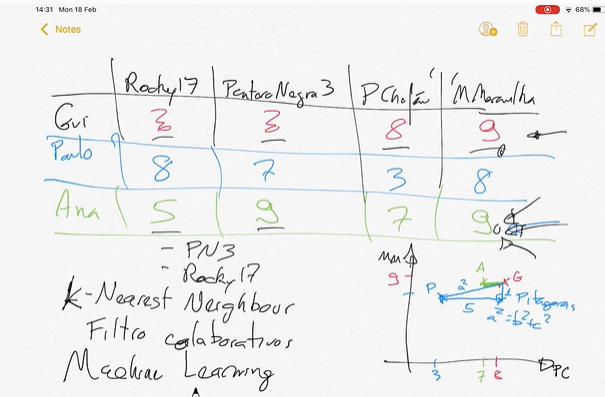